In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pnd

import constants as cnst
from classes import SuperCycle
from helpers import cycles_to_dataframe, supercycles_scenario_to_dataframe
from plotting_helpers import plot_supercycle

### Check cycles modelling

In [2]:
df_sps_cycles = cycles_to_dataframe(cnst.SPS_CYCLES)
df_ps_cycles = cycles_to_dataframe(cnst.PS_CYCLES)
df_psb_cycles = cycles_to_dataframe(cnst.PSB_CYCLES)
df_ps_cycles

,Length [s],BPs,Power (MB+MQ) [MW]
AD,2.4,2.0,0.00
TOF,1.2,1.0,0.00
EAST,2.4,2.0,0.00
MTE,1.2,1.0,0.00
LHC,3.6,3.0,0.00
AWAKE,2.4,2.0,0.00
LHC pilot,2.4,2.0,0.00
MD dedicated,3.6,3.0,0.00
MD parallel,2.4,2.0,0.00
Scrubbing,3.6,3.0,0.00


### Check supercycle modelling

In [3]:
SPS_physics_supercycle = SuperCycle('SPS', 'Physics', [cnst.SPS_CYCLES['SFTPRO'], cnst.SPS_CYCLES['deGauss']])
print('Average power [MW]: %1.2f'%SPS_physics_supercycle.average_power)
print('Supercycle length [s]: %1.1f'%SPS_physics_supercycle.length)
print('Supercycle BPs: %i'%SPS_physics_supercycle.bps)

Average power [MW]: 40.82
Supercycle length [s]: 14.4
Supercycle BPs: 12


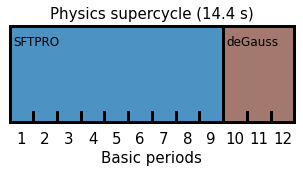

In [4]:
plot_supercycle(SPS_physics_supercycle)

In [5]:
SPS_physics_supercycle.allocate_hours(cnst.SPS_SUPERCYCLES_TIME_SHARING_HOURS['Protons only']['Physics'])
print('Allocated hours to supercycle: %1.1f'%SPS_physics_supercycle.allocated_hours)
print('Allocated seconds to supercycle: %1.1f'%SPS_physics_supercycle.allocated_seconds)
print('Allocated BPs to supercycle: %1.1f'%SPS_physics_supercycle.allocated_bps)
print('Number of times the supercycle is played in the allocated time: %i'%SPS_physics_supercycle.number_of_supercycles_played)
print('Number of times each cycle is played in the allocated time: ', SPS_physics_supercycle.number_of_cycles_played)
#print(SPS)

Allocated hours to supercycle: 1749.0
Allocated seconds to supercycle: 6296400.0
Allocated BPs to supercycle: 5247000.0
Number of times the supercycle is played in the allocated time: 437250
Number of times each cycle is played in the allocated time:  {'SFTPRO': 437250.00000000006, 'deGauss': 437250.00000000006}


In [6]:
SPS_physics_supercycle.calculate_free_bps()
print('Free BPs per supercycle: %i'%SPS_physics_supercycle.free_bps_per_supercycle)
print('Total free BPs in the allocated time: %i'%SPS_physics_supercycle.free_bps_total)

Free BPs per supercycle: 10
Total free BPs in the allocated time: 4372500


### Typical SPS supercycle scenario

In [7]:
SPS_supercycles_scenario = {
    'AWAKE': SuperCycle('SPS', 'AWAKE', 
                        [cnst.SPS_CYCLES['AWAKE'], cnst.SPS_CYCLES['SFTPRO'], cnst.SPS_CYCLES['deGauss']]),
    'AWAKE with parallel MD': SuperCycle('SPS', 'AWAKE with parallel MD', 
                                         [cnst.SPS_CYCLES['AWAKE'], cnst.SPS_CYCLES['MD parallel'], cnst.SPS_CYCLES['SFTPRO']]),
    'Dedicated MD': SuperCycle('SPS', 'Dedicated MD', 
                               [cnst.SPS_CYCLES['MD dedicated']]),
    'HiRadMat': SuperCycle('SPS', 'HiRadMat', 
                           [cnst.SPS_CYCLES['HiRadMat'], cnst.SPS_CYCLES['SFTPRO'], cnst.SPS_CYCLES['deGauss']]),
    'LHC filling': SuperCycle('SPS', 'LHC filling', 
                              [cnst.SPS_CYCLES['LHC filling'], cnst.SPS_CYCLES['SFTPRO'], cnst.SPS_CYCLES['deGauss']]),
    'LHC setup': SuperCycle('SPS', 'LHC setup', 
                            [cnst.SPS_CYCLES['LHC pilot'], cnst.SPS_CYCLES['SFTPRO'], cnst.SPS_CYCLES['deGauss']]),
    'Physics': SuperCycle('SPS', 'Physics', 
                          [cnst.SPS_CYCLES['SFTPRO'], cnst.SPS_CYCLES['deGauss']]),
    'Physics with parallel MD': SuperCycle('SPS', 'Physics with parallel MD', 
                                           [cnst.SPS_CYCLES['MD parallel'], cnst.SPS_CYCLES['SFTPRO']]),
    'Scrubbing': SuperCycle('SPS', 'Scrubbing', 
                            [cnst.SPS_CYCLES['Scrubbing'], cnst.SPS_CYCLES['SFTPRO'], cnst.SPS_CYCLES['deGauss']]),
    'Thursday MD': SuperCycle('SPS', 'Thursday MD', 
                              [cnst.SPS_CYCLES['MD dedicated'], cnst.SPS_CYCLES['SFTPRO'], cnst.SPS_CYCLES['deGauss']]),
}

In [8]:
df_sps_supercycles_scenario = supercycles_scenario_to_dataframe(SPS_supercycles_scenario)
df_sps_supercycles_scenario

/eos/home-t/tprebiba/Fellowship/00_Time_Sharing_SPS/03_protons_PSB-PS/super-cycle-modelling/helpers.py:57: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append(pnd.Series(name=supercycle,data=data))


,AWAKE,HiRadMat,LHC filling,LHC pilot,MD dedicated,MD parallel,SFTPRO,Scrubbing,deGauss,Length [s],Power [MW]
AWAKE,1,-,-,-,-,-,1,-,1,21.6,37.61
AWAKE with parallel MD,1,-,-,-,-,1,1,-,-,25.2,32.36
Dedicated MD,-,-,-,-,1,-,-,-,-,24.0,18.03
HiRadMat,-,1,-,-,-,-,1,-,1,38.4,26.26
LHC filling,-,-,1,-,-,-,1,-,1,38.4,26.57
LHC setup,-,-,-,1,-,-,1,-,1,27.6,36.84
Physics,-,-,-,-,-,-,1,-,1,14.4,40.82
Physics with parallel MD,-,-,-,-,-,1,1,-,-,18.0,32.82
Scrubbing,-,-,-,-,-,-,1,1,1,38.4,26.57
Thursday MD,-,-,-,-,1,-,1,-,1,38.4,26.57


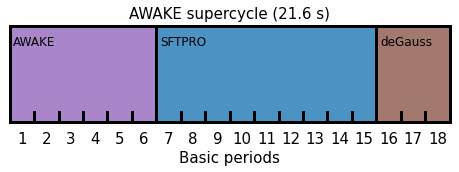

/eos/home-t/tprebiba/Fellowship/00_Time_Sharing_SPS/03_protons_PSB-PS/super-cycle-modelling/classes.py:142: UserWarning: Number of supercycles played not calculated yet, needs to call allocate_hours method first.
  warnings.warn('Number of supercycles played not calculated yet, needs to call allocate_hours method first.')


Free BPs per supercycle: 14


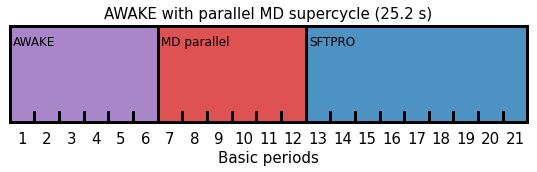

Free BPs per supercycle: 15


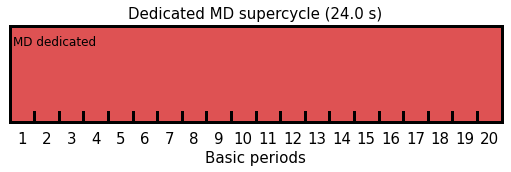

Free BPs per supercycle: 8


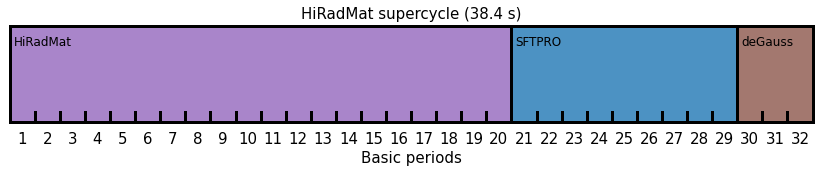

Free BPs per supercycle: 18


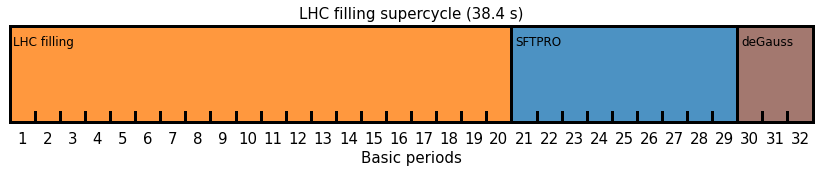

Free BPs per supercycle: 18


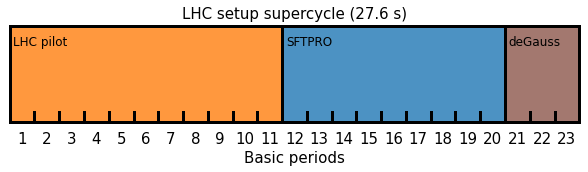

Free BPs per supercycle: 17


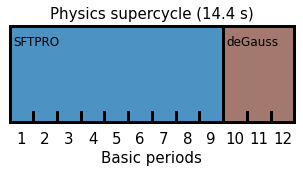

Free BPs per supercycle: 10


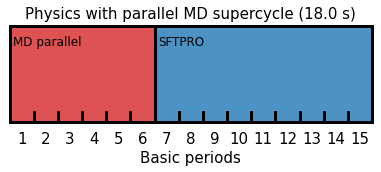

Free BPs per supercycle: 11


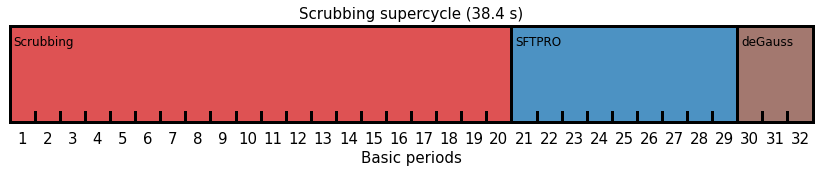

Free BPs per supercycle: 18


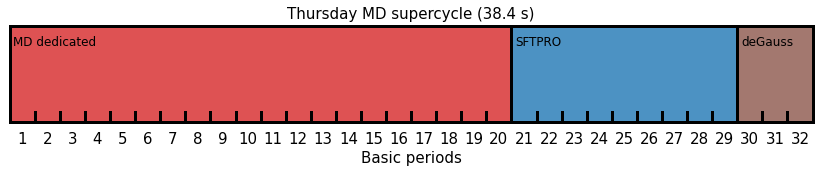

Free BPs per supercycle: 18


In [9]:
for sps_supercycle in SPS_supercycles_scenario.values():
    plot_supercycle(sps_supercycle)
    sps_supercycle.calculate_free_bps()
    print('Free BPs per supercycle: %i'%sps_supercycle.free_bps_per_supercycle)

In [10]:
PS_bps_total = 0
PS_free_bps_total = 0
for sps_supercycle in SPS_supercycles_scenario.values():
    print('*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*')
    print(sps_supercycle.name)
    print('Supercycle BPs: %i'%sps_supercycle.bps)
    
    sps_supercycle.allocate_hours(cnst.SPS_SUPERCYCLES_TIME_SHARING_HOURS['Protons only'][sps_supercycle.name], machine_availability=0.8)
    print('Allocated hours to supercycle: %1.1f'%sps_supercycle.allocated_hours)
    print('Number of times the supercycle is played in the allocated time: %i'%sps_supercycle.number_of_supercycles_played)
    print('Number of times each cycle is played in the allocated time: ', sps_supercycle.number_of_cycles_played)
    
    sps_supercycle.calculate_free_bps()
    print('Free BPs per supercycle: %i'%sps_supercycle.free_bps_per_supercycle)
    print('Total free BPs in the allocated time: %i'%sps_supercycle.free_bps_total)

    PS_bps_total += sps_supercycle.allocated_bps
    PS_free_bps_total += sps_supercycle.free_bps_total

*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*
AWAKE
Supercycle BPs: 18
Allocated hours to supercycle: 443.9
Number of times the supercycle is played in the allocated time: 73990
Number of times each cycle is played in the allocated time:  {'AWAKE': 73990.0, 'SFTPRO': 73990.0, 'deGauss': 73990.0}
Free BPs per supercycle: 14
Total free BPs in the allocated time: 1035860
*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*
AWAKE with parallel MD
Supercycle BPs: 21
Allocated hours to supercycle: 160.9
Number of times the supercycle is played in the allocated time: 22980
Number of times each cycle is played in the allocated time:  {'AWAKE': 22980.000000000004, 'MD parallel': 22980.000000000004, 'SFTPRO': 22980.000000000004}
Free BPs per supercycle: 15
Total free BPs in the allocated time: 344700
*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*
Dedicated MD
Supercycle BPs: 20
Allocated hours to supercycle: 222.0
Number of times the supercycle is played i

In [11]:
print('Total BPs in the PS: %i'%PS_bps_total)
print('Total free BPs in the PS: %i'%PS_free_bps_total)

Total BPs in the PS: 13968000
Total free BPs in the PS: 9968312


### Future SPS supercycle scenario

In [12]:
SPS_physics_supercycle = SuperCycle('SPS', 'Physics', [cnst.SPS_CYCLES['SFTPRO'], cnst.SPS_CYCLES['deGauss'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)']])
print('Average power [MW]: %1.2f'%SPS_physics_supercycle.average_power)
print('Supercycle length [s]: %1.1f'%SPS_physics_supercycle.length)
print('Supercycle BPs: %i'%SPS_physics_supercycle.bps)

SPS_physics_supercycle.allocate_hours(cnst.SPS_SUPERCYCLES_TIME_SHARING_HOURS['Protons only']['Physics'], machine_availability=0.8)
print('Allocated hours to supercycle: %1.1f'%SPS_physics_supercycle.allocated_hours)
print('Allocated seconds to supercycle: %1.1f'%SPS_physics_supercycle.allocated_seconds)
print('Allocated BPs to supercycle: %1.1f'%SPS_physics_supercycle.allocated_bps)
print('Number of times the supercycle is played in the allocated time: %i'%SPS_physics_supercycle.number_of_supercycles_played)
print('Number of times each cycle is played in the allocated time: ', SPS_physics_supercycle.number_of_cycles_played)
#print(SPS)

Average power [MW]: 36.86
Supercycle length [s]: 43.2
Supercycle BPs: 36
Allocated hours to supercycle: 1399.2
Allocated seconds to supercycle: 5037120.0
Allocated BPs to supercycle: 4197600.0
Number of times the supercycle is played in the allocated time: 116599
Number of times each cycle is played in the allocated time:  {'ECN3_D (1.2s)': 466399.99999999994, 'SFTPRO': 116599.99999999999, 'deGauss': 116599.99999999999}


In [13]:
SPS_physics_supercycle.calculate_free_bps()
print('Free BPs per supercycle: %i'%SPS_physics_supercycle.free_bps_per_supercycle)
print('Total free BPs in the allocated time: %i'%SPS_physics_supercycle.free_bps_total)

Free BPs per supercycle: 26
Total free BPs in the allocated time: 3031599


In [14]:
SPS_supercycles_future_scenario = {
    'AWAKE': SuperCycle('SPS', 'AWAKE', 
                        [cnst.SPS_CYCLES['AWAKE'], cnst.SPS_CYCLES['AWAKE'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['SFTPRO'], cnst.SPS_CYCLES['deGauss']]),
    'AWAKE with parallel MD': SuperCycle('SPS', 'AWAKE with parallel MD', 
                                         [cnst.SPS_CYCLES['AWAKE'], cnst.SPS_CYCLES['AWAKE'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['MD parallel'], cnst.SPS_CYCLES['SFTPRO']]),
    'Dedicated MD': SuperCycle('SPS', 'Dedicated MD', 
                               [cnst.SPS_CYCLES['MD dedicated']]),
    'HiRadMat': SuperCycle('SPS', 'HiRadMat', 
                           [cnst.SPS_CYCLES['HiRadMat'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)']]),
    'LHC filling': SuperCycle('SPS', 'LHC filling', 
                              [cnst.SPS_CYCLES['LHC filling'], cnst.SPS_CYCLES['ECN3_D (1.2s)']]),
    'LHC setup': SuperCycle('SPS', 'LHC setup', 
                            [cnst.SPS_CYCLES['LHC pilot'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)']]),
    'Physics': SuperCycle('SPS', 'Physics', 
                          [cnst.SPS_CYCLES['SFTPRO'], cnst.SPS_CYCLES['deGauss'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)']]),
    'Physics with parallel MD': SuperCycle('SPS', 'Physics with parallel MD', 
                                           [cnst.SPS_CYCLES['MD parallel'], cnst.SPS_CYCLES['SFTPRO'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)']]),
    'Scrubbing': SuperCycle('SPS', 'Scrubbing', 
                            [cnst.SPS_CYCLES['Scrubbing'], cnst.SPS_CYCLES['SFTPRO']]),
    'Thursday MD': SuperCycle('SPS', 'Thursday MD', 
                              [cnst.SPS_CYCLES['MD dedicated'], cnst.SPS_CYCLES['SFTPRO'], cnst.SPS_CYCLES['deGauss'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)']]),
}

In [15]:
PS_bps_total = 0
PS_free_bps_total = 0
for sps_supercycle in SPS_supercycles_future_scenario.values():
    print('*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*')
    print(sps_supercycle.name)
    print('Supercycle BPs: %i'%sps_supercycle.bps)
    
    sps_supercycle.allocate_hours(cnst.SPS_SUPERCYCLES_TIME_SHARING_HOURS['Protons only'][sps_supercycle.name], machine_availability=0.8)
    print('Allocated hours to supercycle: %1.1f'%sps_supercycle.allocated_hours)
    print('Number of times the supercycle is played in the allocated time: %i'%sps_supercycle.number_of_supercycles_played)
    print('Number of times each cycle is played in the allocated time: ', sps_supercycle.number_of_cycles_played)
    
    sps_supercycle.calculate_free_bps()
    print('Free BPs per supercycle: %i'%sps_supercycle.free_bps_per_supercycle)
    print('Total free BPs in the allocated time: %i'%sps_supercycle.free_bps_total)

    PS_bps_total += sps_supercycle.allocated_bps
    PS_free_bps_total += sps_supercycle.free_bps_total

*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*
AWAKE
Supercycle BPs: 42
Allocated hours to supercycle: 443.9
Number of times the supercycle is played in the allocated time: 31710
Number of times each cycle is played in the allocated time:  {'AWAKE': 63420.0, 'ECN3_D (1.2s)': 95130.0, 'SFTPRO': 31710.0, 'deGauss': 31710.0}
Free BPs per supercycle: 30
Total free BPs in the allocated time: 951300
*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*
AWAKE with parallel MD
Supercycle BPs: 45
Allocated hours to supercycle: 160.9
Number of times the supercycle is played in the allocated time: 10724
Number of times each cycle is played in the allocated time:  {'AWAKE': 21448.0, 'ECN3_D (1.2s)': 32172.0, 'MD parallel': 10724.0, 'SFTPRO': 10724.0}
Free BPs per supercycle: 31
Total free BPs in the allocated time: 332444
*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*
Dedicated MD
Supercycle BPs: 20
Allocated hours to supercycle: 222.0
Number of times the supe

In [16]:
print('Total BPs in the PS: %i'%PS_bps_total)
print('Total free BPs in the PS: %i'%PS_free_bps_total)

Total BPs in the PS: 13968000
Total free BPs in the PS: 8964282


In [17]:
(1-8964282/9968312)*100

10.07221684072489

### Check actual number of supercycles played in the PS in 2023

In [18]:
source_dir = '../../07_special_presentations/02_JAPW_talk_2023/002_intensity_data/'